In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def softmax(z):
    e = np.exp(z)
    e = e / e.sum(axis=0)
    return e

def relu(z):
    return np.maximum(0, z)

def d_relu(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z

def one_hot_encoding(y):
    # đưa về 3 * 150
    col = np.amax(y) + 1
    res = np.zeros((col, len(y)))
    for i in range(len(y)):
        res[y[i], i] = 1
    
    return res

In [3]:
iris = pd.read_csv('./Iris.csv')
# lấy các thuộc tính của dữ liệu 
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# đưa tên loại hoa về phân loại
iris['Species'].replace(['Setosa', 'Versicolor', 'Virginica'], [0, 1, 2], inplace=True)

# lấy giá trị của cột Species vào y
y = np.array(iris['Species'])
# lấy các giá trị vào x
x = np.array(iris[columns])
# X = np.array(x).T # (4, 150)
# Y = one_hot_coding(y) # (3, 150)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
X_train_n = np.array(X_train).T; y_train_n = one_hot_encoding(y_train.T)
X_test_n = np.array(X_test).T; y_test_n = one_hot_encoding(y_test.T)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [9]:
X_train_n.shape, X_test_n.shape, y_train_n.shape, y_test_n.shape

((4, 120), (4, 30), (3, 120), (3, 30))

In [10]:
input_layer = 150
hidden_layer = 50
output_layer = 3

In [11]:
# khởi tạo giá trị của weights and bias
w1 = 0.01 * np.random.rand(50, 4)
w2 = 0.01 * np.random.rand(3, 50)
b1 = np.zeros((50, 1))
b2 = np.zeros((3, 1))

In [21]:
learning_rate = 0.05 # learning rate
epoch = 10000
num_examples = input_layer
# mảng loss để vẽ biểu đồ
losses = []
for e in range(epoch):
    # Forward
#     A0 = X
    A0 = X_train_n
    A1 = relu(np.dot(w1, A0) + b1)
    A2 = softmax(np.dot(w2, A1) + b2)
    
    # Backward
#     dz2 = A2 - Y
    dz2 = A2 - y_train_n
    dw2 = np.dot(dz2, A1.T) / num_examples
    db2 = np.sum(dz2, axis=1, keepdims=True) / num_examples
    
    # lớp giữa
    dz1 = np.dot(w2.T, dz2) * relu(A1)
    dw1 = np.dot(dz1, A0.T) / num_examples
    db1 = np.sum(dz1, axis=1, keepdims=True) / num_examples
    
    # Cập nhật weights và bias
    w2 -= dw2 * learning_rate
    w1 -= dw1 * learning_rate
    b2 -= db2 * learning_rate
    b1 -= db1 * learning_rate
    
    if (e+1)%100==0:
        loss = -np.sum( y_train_n * np.log(A2) )
        losses.append(loss)
        print(loss)
#     loss = -np.sum( Y * np.log(A2) )
#     losses.append(loss)
print(np.argmax(A2, axis=0))

6.975202272564346
6.965751845986231
6.9565643264713195
6.94757506278105
6.938581414667485
6.929626638013593
6.920872719290167
6.912512861026282
6.903856257519688
6.895350825103854
6.886863668116079
6.878448431954181
6.87008994855549
6.861811989173034
6.853609380083074
6.845627259458103
6.838516214657193
6.830969267902476
6.823891275735628
6.816573544700766
6.801321707078893
6.793129291764121
6.784215538177141
6.77553709259098
6.766905184908413
6.7487042332763405
6.743377397894968
6.733333264258583
6.724715253181767
6.714186042511593
6.703923952830346
6.694043243640611
6.684218480068456
6.674496058226993
6.6652092761396275
6.656368164188822
6.647345756338122
6.638441587787462
6.6298225279570975
6.621313144907488
6.613082156757533
6.605358406100651
6.597642644484219
6.5907174973364455
6.571441951665767
6.5731302391741995
6.562420335352643
6.553898516297071
6.54585209052628
6.538029078007973
6.530547693070434
6.52348739106621
6.516897029514259
6.510535168577867
6.487545998390992
6.4874256

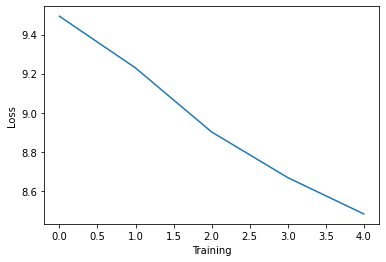

In [14]:
plt.plot(losses)
plt.xlabel('Training')
plt.ylabel('Loss')
plt.show()

In [15]:
# X_test_n = X_test_n.T
# y_test_n = y_test_n.T
# X_test_n[0], y_test_n[0]

In [16]:
# Predictor
A0 = X_test_n
A1 = relu(np.dot(w1, A0) + b1)
A2 = softmax(np.dot(w2, A1) + b2)

# Check accuracy
y_pred = []
counter = 0
for label_predict, label_real in zip(A2.T, y_test_n.T):
    predict = np.argmax(label_predict)
    real = np.argmax(label_real)
    y_pred.append(predict)
    if predict == real:
        counter += 1
print("Accuracy: ", counter*100 / y_test_n.shape[1], "%")

Accuracy:  100.0 %


In [17]:
y_test_n.shape

(3, 30)